## Principal Component Analysis - Part III

Author: [Biswajit Sahoo](https://biswajitsahoo1111.github.io/)

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a href="https://colab.research.google.com/github/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/PCA_Abdi_in_python.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run Python code in Google Colab</a>
  </td>
  <td>
    <a href="https://www.dropbox.com/s/gn415uh3quou3a8/PCA_Abdi_in_python.ipynb?dl=1"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download Python code</a>
  </td>
  <td>
    <a href="https://www.dropbox.com/s/tp56l6v7upa1apf/PCA_blog_Biswajit_Sahoo_part_3.Rmd?dl=1"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download R code (R Markdown)</a>
  </td>
</table>

In this post, we will reproduce the results of a popular paper on PCA. The paper is titled '[Principal component analysis](https://personal.utdallas.edu/~herve/abdi-awPCA2010.pdf)' and is authored by [Herve Abdi](https://personal.utdallas.edu/~herve/) and [Lynne J. Williams](https://ljwilliams.github.io/). It got published in 2010 and since then its popularity has only grown. Its number of citations are more than 4800 as per Google Scholar data (This was the number when this post was last revised).

This post is Part-III of a three part series on PCA. Other parts of the series can be found at the links below. 

* [Part-I: Basic Theory of PCA](https://biswajitsahoo1111.github.io/post/principal-component-analysis-part-i/)
* [Part-II: PCA Implementation with and without using built-in functions](https://biswajitsahoo1111.github.io/post/principal-component-analysis-part-ii/)

This post contains code snippets in `Python`. To produce `ggplot` like plots, we have used `plotnine` package of `Python`. If that package is not availabe, it can be installed by using the command `pip install plotnine`.

### Structure of the paper
Along with basic theory, the paper contains three examples on PCA, one example on correspondence analysis, and one example on multiple factor analysis. We will only focus on PCA examples in this post.

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_text, geom_hline, geom_vline, labs, xlim, ylim, geom_abline, annotate, geom_path

### How to get data
Data for the following examples have been taken from the paper. These datasets are pretty small. So one way to read it is to create a dataframe itself in `Pandas` using the values given in paper. Otherwise, the values can first be saved in a csv file and then read from it. To make this post self-sufficient, we will adopt the former approach.

In [2]:
words = pd.DataFrame(data = {"Words": ["Bag", "Across", "On", "Insane", "By", "Monastery", "Relief", "Slope", "Scoundrel", 
                                       "With", "Neither", "Pretentious", "Solid", "This", "For", "Therefore", "Generality", 
                                       "Arise", "Blot", "Infectious"],
                             "Word_length": [3, 6, 2, 6, 2, 9, 6, 5, 9, 4, 7, 11, 5, 4, 3, 9, 10, 5, 4, 10],
                             "Lines_in_dict": [14, 7, 11, 9, 9, 4, 8, 11, 5, 8, 2, 4, 12, 9, 8, 1, 4, 13, 15, 6]})
words

,Words,Word_length,Lines_in_dict
0,Bag,3,14
1,Across,6,7
2,On,2,11
3,Insane,6,9
4,By,2,9
5,Monastery,9,4
6,Relief,6,8
7,Slope,5,11
8,Scoundrel,9,5
9,With,4,8


Change data types from int to float. This will facilitate our analysis later. Otherwise some warnings will be generated.

In [3]:
words.iloc[:,1:3] = words.iloc[:,1:3].astype(np.float64)
words.dtypes

Words             object
Word_length      float64
Lines_in_dict    float64
dtype: object

`sklearn`'s PCA centers data by default before applying SVD. In this example, we will explicitly center the data before giving it as an argument to PCA's `fit` method.

In [4]:
cent_data = StandardScaler(with_mean= True, with_std = False)
centered_words = cent_data.fit_transform(words.iloc[:,1:3])
centered_words

array([[-3.,  6.],
       [ 0., -1.],
       [-4.,  3.],
       [ 0.,  1.],
       [-4.,  1.],
       [ 3., -4.],
       [ 0.,  0.],
       [-1.,  3.],
       [ 3., -3.],
       [-2.,  0.],
       [ 1., -6.],
       [ 5., -4.],
       [-1.,  4.],
       [-2.,  1.],
       [-3.,  0.],
       [ 3., -7.],
       [ 4., -4.],
       [-1.,  5.],
       [-2.,  7.],
       [ 4., -2.]])

### Covariance PCA
Covariance PCA uses centered data matrix. But data matrix is not scaled. 

In [5]:
pca_words_cov = PCA().fit(centered_words)

In [6]:
factor_scores_words = pca_words_cov.transform(centered_words)
print(np.round(factor_scores_words,2))

[[-6.67 -0.69]
 [ 0.84  0.54]
 [-4.68  1.76]
 [-0.84 -0.54]
 [-2.99  2.84]
 [ 4.99 -0.38]
 [ 0.    0.  ]
 [-3.07 -0.77]
 [ 4.14 -0.92]
 [-1.07  1.69]
 [ 5.6   2.38]
 [ 6.06 -2.07]
 [-3.91 -1.3 ]
 [-1.92  1.15]
 [-1.61  2.53]
 [ 7.52  1.23]
 [ 5.52 -1.23]
 [-4.76 -1.84]
 [-6.98 -2.07]
 [ 3.83 -2.3 ]]


Note that both of our factor scores are negative of that given in paper. It doesn't matter as principal directions are orthogonal. But to match the results of this notebook with that of the paper, we will multiply `factor scores` with -1 so that it matches with the values given in the paper.

In [7]:
factor_scores_words = -factor_scores_words
np.round(factor_scores_words,2)

array([[ 6.67,  0.69],
       [-0.84, -0.54],
       [ 4.68, -1.76],
       [ 0.84,  0.54],
       [ 2.99, -2.84],
       [-4.99,  0.38],
       [-0.  , -0.  ],
       [ 3.07,  0.77],
       [-4.14,  0.92],
       [ 1.07, -1.69],
       [-5.6 , -2.38],
       [-6.06,  2.07],
       [ 3.91,  1.3 ],
       [ 1.92, -1.15],
       [ 1.61, -2.53],
       [-7.52, -1.23],
       [-5.52,  1.23],
       [ 4.76,  1.84],
       [ 6.98,  2.07],
       [-3.83,  2.3 ]])

### Principal directions are orthogonal

In [8]:
np.sum(factor_scores_words[:,0] * factor_scores_words[:,1])

3.552713678800501e-15

### Contribution of each factor

In [9]:
np.round(factor_scores_words[:,0]**2/sum(factor_scores_words[:,0]**2)*100,2)

array([11.36,  0.18,  5.58,  0.18,  2.28,  6.34,  0.  ,  2.4 ,  4.38,
        0.29,  8.  ,  9.37,  3.9 ,  0.94,  0.66, 14.41,  7.78,  5.77,
       12.43,  3.75])

In [10]:
np.round(factor_scores_words[:,1]**2/sum(factor_scores_words[:,1]**2)*100,2)

array([ 0.92,  0.55,  5.98,  0.55, 15.49,  0.28,  0.  ,  1.13,  1.63,
        5.48, 10.87,  8.25,  3.27,  2.55, 12.32,  2.9 ,  2.9 ,  6.52,
        8.25, 10.18])

### Squared distance to center of gravity

In [11]:
np.sum(factor_scores_words**2,axis = 1)

array([45.,  1., 25.,  1., 17., 25.,  0., 10., 18.,  4., 37., 41., 17.,
        5.,  9., 58., 32., 26., 53., 20.])

### Squared cosine of observations

In [12]:
sq_cos = factor_scores_words**2/np.sum(factor_scores_words**2, axis = 1).reshape((20,1))*100
print(np.round(sq_cos))

[[99.  1.]
 [71. 29.]
 [88. 12.]
 [71. 29.]
 [53. 47.]
 [99.  1.]
 [nan nan]
 [94.  6.]
 [95.  5.]
 [29. 71.]
 [85. 15.]
 [90. 10.]
 [90. 10.]
 [74. 26.]
 [29. 71.]
 [97.  3.]
 [95.  5.]
 [87. 13.]
 [92.  8.]
 [74. 26.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


`nan`s are produced because of division by zero.

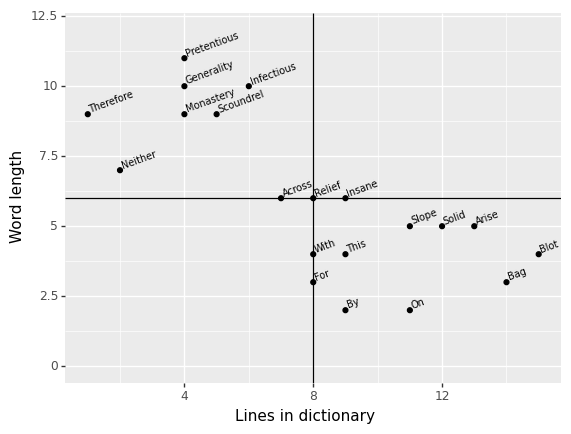

<ggplot: (8765302853184)>


In [13]:
# Figure 1
p = (ggplot(words,aes(x = "Lines_in_dict", y = "Word_length", label = "Words"))
 + geom_point()+ geom_text(size = 7, ha = "left", va = "bottom", angle = 20)
 + geom_hline(yintercept = 6)+geom_vline(xintercept = 8)
 + labs(x = "Lines in dictionary",y = "Word length")
 + ylim([0,12]))
print(p)

In [14]:
# Show directions of PCs
# Note that intercept argument in geom_abline considers the line to be at the origin. In our case the data are mean shifted.
# So we have to adjust the intercept taking new origin into consideration. These adjustments have been made below.
slope1 = pca_words_cov.components_.T[0,0]/pca_words_cov.components_.T[1,0] # Slope of first PC
slope2 = pca_words_cov.components_.T[0,1]/pca_words_cov.components_.T[1,1] # Slope of second PC
new_origin = [np.mean(words["Lines_in_dict"]), np.mean(words["Word_length"])]
print("New Origin: " ,new_origin)

New Origin:  [8.0, 6.0]


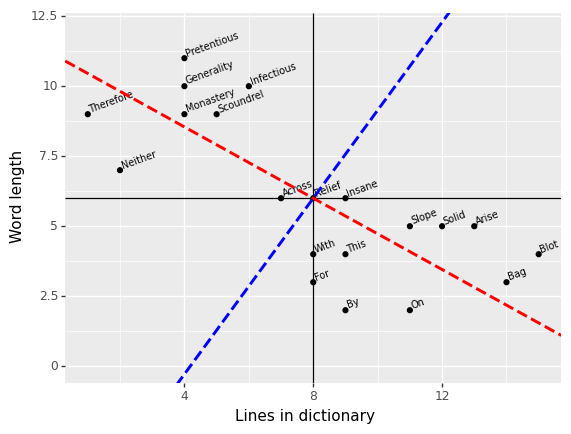

<ggplot: (-9223363271556114772)>

In [15]:
intercept1 = 6 - slope1*8
intercept2 = 6 - slope2*8
(p + geom_abline(slope = slope1,intercept = intercept1,linetype = "dashed",size = 1.2,color = "red")
   + geom_abline(slope = slope2,intercept = intercept2,linetype = "dashed",size = 1.2,color = "blue"))

In the above figure red dashed line is the 1st principal component (PC) and blue dashed line is the 2nd PC.

### Rotated PCs
This figure is obtained by plotting factor scores. Note that we will plot negative of the factor scores of 1st PC to make the figure consistent with the paper.

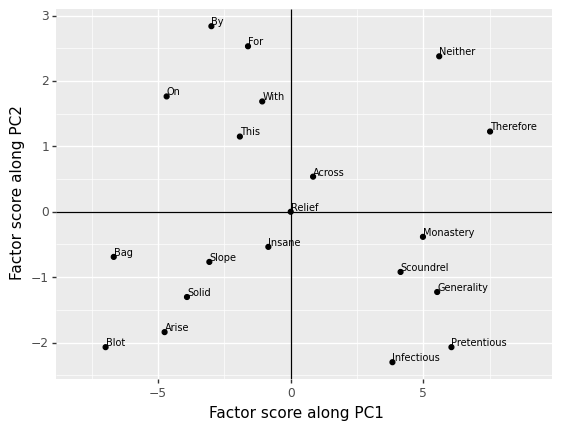

<ggplot: (-9223363271551948579)>

In [16]:
(ggplot(pd.DataFrame(data = {"factor_scores_1": -factor_scores_words[:,0], "factor_scores_2": -factor_scores_words[:,1]}),
       aes(x = "factor_scores_1", y = "factor_scores_2", label = words["Words"]))
 + geom_point()+geom_text(size = 7, ha = "left", va = "bottom")+geom_hline(yintercept = 0)+geom_vline(xintercept = 0)
 + labs(x = "Factor score along PC1", y = "Factor score along PC2") + xlim([-8,9]))

### With supplementray data
Given a supplementary point (a point previously not used in finding principal components),we have to first center the data point. Its factor scores can then be obtained by multiplying it with the loading matrix.

In [17]:
sur = np.array([3,12])
sur_centered = sur - np.mean(words.iloc[:,1:3], axis = 0)
sur_centered

Word_length     -3.0
Lines_in_dict    4.0
dtype: float64

### Factor score of the new word 'sur'.

In [18]:
np.round(pca_words_cov.transform(sur_centered.values.reshape(-1,2)),2)

array([[-4.99,  0.38]])

### Total variance before

In [19]:
np.round(np.sum(np.var(words.values[:,1:3], axis = 0, ddof = 1)),3)

23.368

### Total variance after transformation.

In [20]:
np.round(np.sum(pca_words_cov.explained_variance_),3)

23.368

### Correlation matrix
We have taken a convoluted path to find correlation matrix. But there might exist simpler ways.

In [21]:
cor_matrix = np.repeat(np.nan, 4).reshape(2,2)
for i in range(2):
    for j in range(2):
        cor_matrix[i,j] = np.corrcoef(factor_scores_words[:,i], centered_words[:,j])[0,1]
cor_matrix

array([[-0.86790259,  0.97417637],
       [ 0.49673443,  0.22578838]])

Note that the answers for correlation coefficients don’t match with that of the paper. Readers who get actual answers as given in paper are encouraged to send me an email using my contact details. However our procedure is correct and it does indeed give the correct answer for supplementary data as described below.

### Squared correlation

In [22]:
np.square(cor_matrix)

array([[0.7532549 , 0.94901961],
       [0.2467451 , 0.05098039]])

Sum of correlation coefficients between variables and principal components is 1

In [23]:
np.sum(np.square(cor_matrix),axis = 0)

array([1., 1.])

### Loading matrix matrix

In [24]:
pca_words_cov.components_.T            # This is the loading matrix

array([[ 0.53687549, -0.84366149],
       [-0.84366149, -0.53687549]])

### Correlation score for supplemenatry variables

In [25]:
# Supplementary variable (Table 4)
Frequency = np.array([8,230,700,1,500,1,9,2,1,700,7,1,4,500,900,3,1,10,1,1])
Num_entries = np.array([6,3,12,2,7,1,1,6,1,5,2,1,5,9,7,1,1,4,4,2])
supp_data = pd.DataFrame({"Frequency" : Frequency, "Num_entries" : Num_entries})
supp_data

,Frequency,Num_entries
0,8,6
1,230,3
2,700,12
3,1,2
4,500,7
5,1,1
6,9,1
7,2,6
8,1,1
9,700,5


### Centered suplementary data

In [26]:
supp_data_cent = cent_data.fit_transform(supp_data.astype(np.float64))
supp_data_cent

array([[-171.,    2.],
       [  51.,   -1.],
       [ 521.,    8.],
       [-178.,   -2.],
       [ 321.,    3.],
       [-178.,   -3.],
       [-170.,   -3.],
       [-177.,    2.],
       [-178.,   -3.],
       [ 521.,    1.],
       [-172.,   -2.],
       [-178.,   -3.],
       [-175.,    1.],
       [ 321.,    5.],
       [ 721.,    3.],
       [-176.,   -3.],
       [-178.,   -3.],
       [-169.,    0.],
       [-178.,    0.],
       [-178.,   -2.]])

### Corrlation score for supplementary data

In [27]:
cor_score_supp = np.repeat(np.nan,4).reshape(2,2)
for i in range(2):
    for j in range(2):
        cor_score_supp[i,j] = np.corrcoef(factor_scores_words[:,i], supp_data_cent[:,j])[0,1]
cor_score_supp

array([[ 0.30118937,  0.69994982],
       [-0.72183055, -0.44928258]])

Note that signs of entries of this correlation matrix are different than that of the paper. This is because our factor scores are negative of the factor scores given in paper. As correlation depends on sign of input data, we get different signs for some entries.

### Squared correlation for support data

In [28]:
np.square(cor_score_supp)

array([[0.09071503, 0.48992975],
       [0.52103934, 0.20185483]])

### Column sums of squared correlation for support data

In [29]:
np.sum(np.square(cor_score_supp), axis = 0)

array([0.61175437, 0.69178458])

### Corrlation circle plot

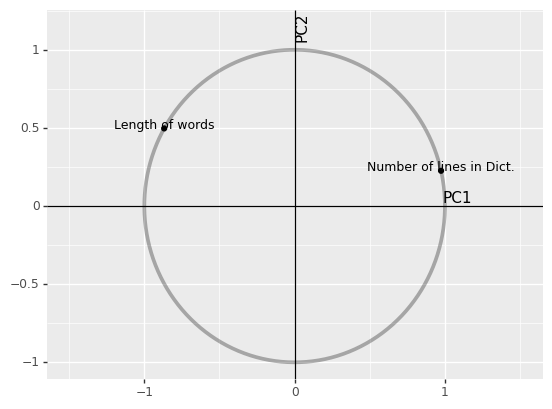

<ggplot: (8765298563606)>


In [30]:
x = np.linspace(0, 2*np.pi, num = 300)
circle = (ggplot() + geom_path(pd.DataFrame(data = {"a": np.cos(x), "b": np.sin(x)}),
                     aes(np.cos(x),np.sin(x)),alpha = 0.3, size = 1.5)+
            geom_hline(yintercept = 0)+geom_vline(xintercept = 0)
    + annotate("text",x = [1.08,0.05],y = [0.05,1.15],label = ["PC1","PC2"],angle = [0,90])+
            labs(x = None, y = None))

cor_score = np.repeat(np.nan,4).reshape(2,2)
for i in range(2):
    for j in range(2):
        cor_score[i,j] = np.corrcoef(centered_words[:,i], factor_scores_words[:,j])[0,1]
        
cor_score = pd.DataFrame(data = cor_score, index = ["Length of words","Number of lines in Dict."], columns = ["PC1","PC2"])
variable_original_plot = (circle + geom_point(cor_score , aes(cor_score["PC1"],cor_score["PC2"]), inherit_aes = False)
                         + annotate("text",x = [cor_score.iloc[0,0],cor_score.iloc[1,0]],
                                    y = [cor_score.iloc[0,1],cor_score.iloc[1,1]],
                                    label = ["Length of words","Number of lines in Dict."], size = 9, ha = "center",
                                    va = "baseline")+xlim([-1.5, 1.5]))
print(variable_original_plot)

### Plotting supplementary variables

In [31]:
pd.DataFrame(cor_score_supp)

,0,1
0,0.301189,0.699950
1,-0.721831,-0.449283


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

  warn(_TPL_DUPLICATE_SCALE.format(ae), PlotnineWarning)


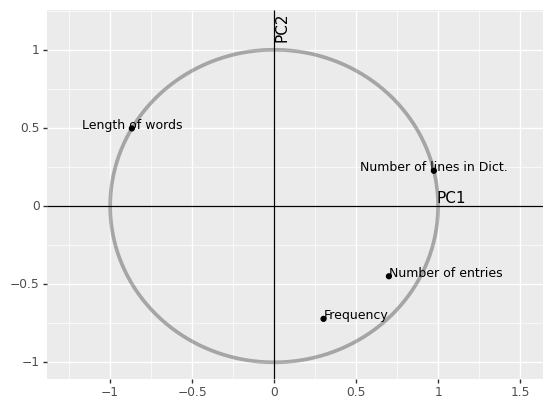

<ggplot: (-9223363271556137419)>

In [32]:
(variable_original_plot+ geom_point(pd.DataFrame(cor_score_supp), aes(cor_score_supp[0], cor_score_supp[1])) +
  annotate("text",x = [cor_score_supp[0,0],cor_score_supp[0,1]],
                                    y = [cor_score_supp[1,0],cor_score_supp[1,1]],
                                    label = ["Frequency","Number of entries"], size = 9, ha = "left",
                                    va = "baseline")+xlim([-1.25, 1.5]))

## Example 2
### Wine example

### Correlation PCA with wine data

In [33]:
wine = pd.DataFrame(data = {"wine_type": ["wine_1", "wine_2", "wine_3", "wine_4", "wine_5"],
                            "hedonic": [14, 10, 8, 2, 6],
                            "for_meat": [7, 7, 5, 4, 2],
                            "for_dessert": [8, 6, 5, 7, 4],
                            "price": [7, 4, 10, 16, 13],
                            "sugar": [7, 3, 5, 7, 3],
                            "alcohol": [13, 14, 12, 11, 10],
                            "acidity": [7, 7, 5, 3, 3]})
wine

,wine_type,hedonic,for_meat,for_dessert,price,sugar,alcohol,acidity
0,wine_1,14,7,8,7,7,13,7
1,wine_2,10,7,6,4,3,14,7
2,wine_3,8,5,5,10,5,12,5
3,wine_4,2,4,7,16,7,11,3
4,wine_5,6,2,4,13,3,10,3


### Centered and scaled wine data

In [34]:
scale_data = StandardScaler()
scaled_wine_data = scale_data.fit_transform(wine.iloc[:,1:8].astype(np.float64))

**Note**: Standard scaler centers each colulmn and divides each coulmn by its standard deviation to produce scaled data for each column. But standard deviation for each column is computed using numpy's `np.std()` command. By default `np.std()` is biased. In contrast, in **R** standard deviation is unbiased by default. So we will use unbiased standard deviation values to make scaled data in python. In this way we get same results as in `R`. This conversion is obtained by a scalar multiplication.

The factor is $$\frac{1}{\sqrt{\frac{N}{N-1}}}$$ Where $N$ is number of data points. In our case $N=5$ as there are five wine types in this example.

In [35]:
scaled_wine_data = scaled_wine_data* (1/np.sqrt(5/4))   

### PCA on scaled wine data

In [36]:
pca_wine_cor = PCA().fit(scaled_wine_data)

In [37]:
transformed_data_wine = pca_wine_cor.transform(scaled_wine_data)

### First two principal components

In [38]:
np.round(transformed_data_wine[:,0:2],4)

array([[-2.3302,  1.0953],
       [-2.0842, -1.2232],
       [ 0.1673, -0.3703],
       [ 1.7842,  1.7126],
       [ 2.4628, -1.2144]])

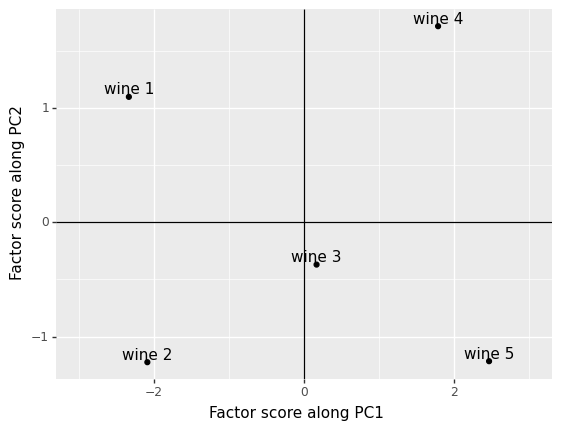

<ggplot: (-9223363271556260348)>

In [39]:
transformed_data_wine_2PCs = pd.DataFrame(data = transformed_data_wine[:,:2], columns = ["PC1", "PC2"])
(ggplot(transformed_data_wine_2PCs, aes(x = "PC1", y = "PC2", label = ["wine 1", "wine 2", "wine 3", "wine 4", "wine 5"]))
       + geom_point() + geom_text(va = "bottom") + geom_vline(xintercept = 0)+ geom_hline(yintercept = 0)
       + labs(x = "Factor score along PC1", y = "Factor score along PC2") + xlim([-3,3]))

Our figure seems upside down than that of the paper. This is a minor discrepancy. Our 2nd eigenvector is negative of the one considered in paper. We can match the plot with that of the paper by just flipping the second principal component but we will not do that here.

### Contribution of each observation to principal component

In [40]:
np.round(transformed_data_wine[:,0:2]**2/np.sum(transformed_data_wine[:,0:2]**2, axis = 0 )*100,2)

array([[28.5 , 16.57],
       [22.8 , 20.66],
       [ 0.15,  1.89],
       [16.71, 40.51],
       [31.84, 20.37]])

### Squared cosine of observations

In [41]:
np.round(transformed_data_wine[:,0:2]**2/np.sum(transformed_data_wine**2, axis = 1).reshape(5,1)*100)

array([[77., 17.],
       [69., 24.],
       [ 7., 34.],
       [50., 46.],
       [78., 19.]])

### Loading scores corresponding to first two principal components

In [42]:
np.round(pca_wine_cor.components_[0:2,:].T,2)

array([[-0.4 , -0.11],
       [-0.45,  0.11],
       [-0.26,  0.59],
       [ 0.42,  0.31],
       [-0.05,  0.72],
       [-0.44, -0.06],
       [-0.45, -0.09]])

### Correlation score of variables with first two principal components
Rows correspond to PC1 and PC2 respectively and columns correspond to featuers in wine data.

In [43]:
cor_score_wine = np.repeat(np.nan,14).reshape(2,7)
for i in range(2):
    for j in range(7):
        cor_score_wine[i,j] = np.corrcoef(transformed_data_wine[:,i], wine.values[:,j+1].astype(np.float64))[0,1]
np.round(cor_score_wine,2)

array([[-0.87, -0.97, -0.58,  0.91, -0.11, -0.96, -0.99],
       [-0.15,  0.15,  0.79,  0.42,  0.97, -0.07, -0.12]])

### Correlation circle for wine data

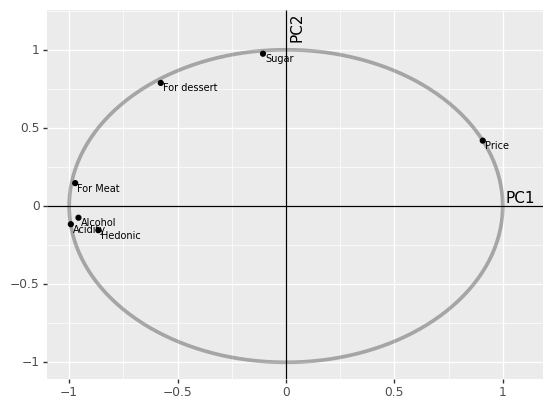

<ggplot: (8765298453466)>

In [44]:
# Figure 6
cor_score_wine = cor_score_wine.T
(circle +geom_point( aes("PC1","PC2"), data = pd.DataFrame(cor_score_wine,columns = ["PC1", "PC2"]))
+ annotate("text", x = cor_score_wine[:,0], y = cor_score_wine[:,1], 
           label = ["Hedonic","For Meat","For dessert","Price","Sugar","Alcohol","Acidity"],
           va = "top", ha = "left", size = 7, nudge_x = 0.01))

## Varimax roation

There is no function in python that performs varimax rotation. However, there are public codes to perform it in python. We use the code from this [Wikipedia page](https://en.wikipedia.org/wiki/Talk:Varimax_rotation). The function below is exact copy of the funciton in that page with minor changes.

In [45]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    import numpy as np
    from numpy import eye, dot, asarray, sum
    from scipy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in np.arange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

We will compute rotated scores for first two columns of loading matrix that correspond to first two principal components.

In [46]:
np.round(varimax(pca_wine_cor.components_.T[:,0:2]),2)

array([[-0.41, -0.03],
       [-0.41,  0.2 ],
       [-0.14,  0.63],
       [ 0.47,  0.22],
       [ 0.1 ,  0.72],
       [-0.44,  0.04],
       [-0.46,  0.01]])

In the above result, rows correspond to features in wine data. First column is the modified loading scores corresponding to first principal component and similarly for second column. Note that this result doesn't match with the paper. Neither does it match with `R` results. But it is close to the results given in paper.

### Plot of loading scores before rotation

In [47]:
pca_wine_cor.components_.shape

(5, 7)

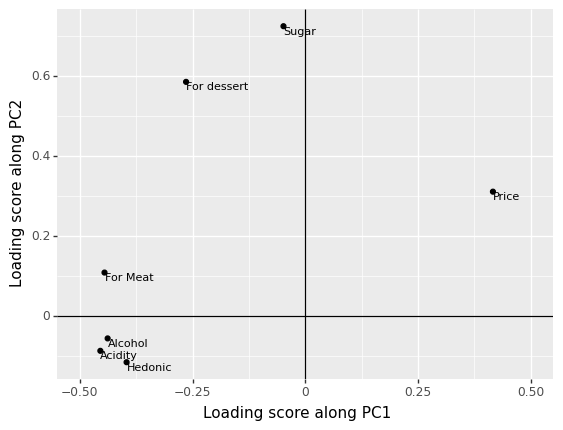

<ggplot: (8765298451639)>

In [48]:
#Figure 7
(ggplot(pd.DataFrame(pca_wine_cor.components_.T[:,:2], columns = ["loadings_1", "loadings_2"]),
       aes(x = "loadings_1", y = "loadings_2"))
+ geom_point() + geom_hline(yintercept = 0)+geom_vline(xintercept = 0)
+ annotate("text", x = pca_wine_cor.components_.T[:,0], y = pca_wine_cor.components_.T[:,1],
           label = ["Hedonic","For Meat","For dessert","Price","Sugar","Alcohol","Acidity"],
           va = "top", ha = "left", size = 8)+ xlim([-0.5, 0.5])
+ labs(x = "Loading score along PC1", y = "Loading score along PC2"))

### Plot of loading scores after rotation

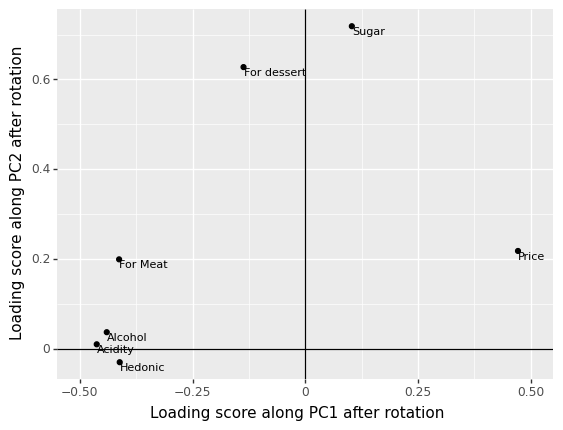

<ggplot: (-9223363271556290837)>

In [49]:
rotated_loading_scores = varimax(pca_wine_cor.components_.T[:,0:2])
(ggplot(pd.DataFrame(rotated_loading_scores, columns = ["rotated_loadings_1", "rotated_loadings_2"]),
        aes(x = "rotated_loadings_1", y = "rotated_loadings_2"))
+ geom_point() + geom_hline(yintercept = 0)+geom_vline(xintercept = 0)
+ annotate("text", x = rotated_loading_scores[:,0], y = rotated_loading_scores[:,1],
           label = ["Hedonic","For Meat","For dessert","Price","Sugar","Alcohol","Acidity"],
           va = "top", ha = "left", size = 8) + xlim([-0.5, 0.5])
+ labs(x = "Loading score along PC1 after rotation", y = "Loading score along PC2 after rotation"))                                 

## Example 3
### French food example (Covariance PCA)

In [50]:
food = pd.DataFrame(data = {"class": ["Blue_collar", "White_collar", "Upper_class", "Blue_collar", "White_collar", "Upper_class",
                                      "Blue_collar", "White_collar", "Upper_class", "Blue_collar", "White_collar", "Upper_class"],
                            "children": np.repeat([2,3,4,5], 3),
                            "bread": [332, 293, 372, 406, 386, 438, 534, 460, 385, 655, 584, 515],
                            "vegetables": [428, 559, 767, 563, 608, 843, 660, 699, 789, 776, 995, 1097],
                            "fruit": [354, 388, 562, 341, 396, 689, 367, 484, 621, 423, 548, 887],
                            "meat": [1437, 1527, 1948, 1507, 1501, 2345, 1620, 1856, 2366, 1848, 2056, 2630],
                            "poultry": [526, 567, 927, 544, 558, 1148, 638, 762, 1149, 759, 893, 1167],
                            "milk": [247, 239, 235, 324, 319, 243, 414, 400, 304, 495, 518, 561],
                            "wine": [427, 258, 433, 407, 363, 341, 407, 416, 282, 486, 319, 284]})
food

,class,children,bread,vegetables,fruit,meat,poultry,milk,wine
0,Blue_collar,2,332,428,354,1437,526,247,427
1,White_collar,2,293,559,388,1527,567,239,258
2,Upper_class,2,372,767,562,1948,927,235,433
3,Blue_collar,3,406,563,341,1507,544,324,407
4,White_collar,3,386,608,396,1501,558,319,363
5,Upper_class,3,438,843,689,2345,1148,243,341
6,Blue_collar,4,534,660,367,1620,638,414,407
7,White_collar,4,460,699,484,1856,762,400,416
8,Upper_class,4,385,789,621,2366,1149,304,282
9,Blue_collar,5,655,776,423,1848,759,495,486


In [51]:
food_cov = PCA().fit(food.iloc[:,2:9])

### Factor scores
`sklearn`'s PCA centers data by default before applying the algorithm. We can also center data manually before giving it as an argument to fit method.

In [52]:
factor_scores_food = food_cov.transform(food.iloc[:,2:9])
np.round(factor_scores_food[:,0:2],2)

array([[-635.05, -120.89],
       [-488.56, -142.33],
       [ 112.03, -139.75],
       [-520.01,   12.05],
       [-485.94,    1.17],
       [ 588.17, -188.44],
       [-333.95,  144.54],
       [ -57.51,   42.86],
       [ 571.32, -206.76],
       [ -39.38,  264.47],
       [ 296.04,  235.92],
       [ 992.83,   97.15]])

### Contribution of each observation to principal component

In [53]:
np.round(factor_scores_food[:,0:2]**2/np.sum(factor_scores_food[:,0:2]**2, axis = 0)*100,2)

array([[13.34,  5.03],
       [ 7.9 ,  6.97],
       [ 0.42,  6.72],
       [ 8.94,  0.05],
       [ 7.81,  0.  ],
       [11.44, 12.22],
       [ 3.69,  7.19],
       [ 0.11,  0.63],
       [10.8 , 14.71],
       [ 0.05, 24.07],
       [ 2.9 , 19.15],
       [32.61,  3.25]])

### Squared cosine of observations

In [54]:
np.round(factor_scores_food[:,0:2]**2/np.sum(factor_scores_food**2, axis = 1).reshape(12,1)*100)

array([[ 95.,   3.],
       [ 86.,   7.],
       [ 26.,  40.],
       [100.,   0.],
       [ 98.,   0.],
       [ 89.,   9.],
       [ 83.,  15.],
       [ 40.,  22.],
       [ 86.,  11.],
       [  2.,  79.],
       [ 57.,  36.],
       [ 97.,   1.]])

### Squared loading scores

In [55]:
np.round(food_cov.components_.T[:,0:2]**2, 2)

array([[0.01, 0.33],
       [0.11, 0.17],
       [0.09, 0.01],
       [0.57, 0.01],
       [0.22, 0.06],
       [0.01, 0.4 ],
       [0.  , 0.02]])

Note that this answer doesn't match with the answers given in paper (Table 13). But we will stick with our result.

### Correlation score

In [56]:
corr_score_food = np.repeat(np.nan,14).reshape(2,7)
for i in range(2):
    for j in range(7):
        corr_score_food[i,j] = np.corrcoef(factor_scores_food[:,i], food.values[:,j+2].astype(np.float64))[0,1]
np.round(corr_score_food,2)

array([[ 0.36,  0.91,  0.96,  1.  ,  0.98,  0.41, -0.43],
       [ 0.87,  0.35, -0.1 , -0.04, -0.16,  0.88,  0.33]])

In the above answer, each column corresponds to a feature in food data excluding class and children. The two rows correspond to first two principal components. Second row of above answer also differs in sign from the results of `R`. This is due to the fact that second principal component factor scores of `R` are negative of python's.

### Squared correlation score

In [57]:
np.round(corr_score_food**2,2)

array([[0.13, 0.83, 0.92, 1.  , 0.96, 0.17, 0.18],
       [0.76, 0.12, 0.01, 0.  , 0.03, 0.77, 0.11]])

### Correlation circle for food data

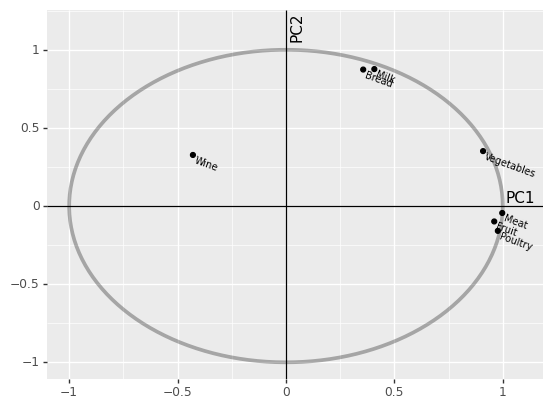

<ggplot: (8765298447066)>

In [58]:
# Figure 9
(circle + geom_point(aes(x = "PC1", y = "PC2"), data = pd.DataFrame(corr_score_food.T, columns = ["PC1", "PC2"]))
+ annotate("text", x = corr_score_food[0,:], y = corr_score_food[1,:],
           label = ["Bread","Vegetables","Fruit","Meat","Poultry","Milk","Wine"],
           va = "top", ha = "left",angle = -20, size = 7))

Now observe that our correlation circle plot is almost close to that of the papers though in opposite quadrants. This is because our first principal component is negative of the one given in the paper.

### Eigenvalues

Eigen values of data covariance matrix is square of singular values of centered data matrix. Hence eigen values of data covariance matrix can be obtained as below.

In [59]:
# Table 14
eigen_values = food_cov.singular_values_.reshape(7,1)**2
np.set_printoptions(suppress= True)
np.round(eigen_values,2)

array([[3023141.24],
       [ 290575.84],
       [  68795.23],
       [  25298.95],
       [  22992.25],
       [   3722.32],
       [    723.92]])

**Important Note**: These eigenvalues are not the same as variance of factor scores in principal components. Variance of principal component factor scores can be obtained by dividing the eigenvalues by $(n-1)$ , where $n$ is number of data points (in this case $n = 12$ ). If this point is still not clear, refer to [Part-II](https://biswajitsahoo1111.github.io/post/principal-component-analysis-part-ii/).

### Percentage contribution of each principal component

In [60]:
np.round(eigen_values/np.sum(eigen_values),2)

array([[0.88],
       [0.08],
       [0.02],
       [0.01],
       [0.01],
       [0.  ],
       [0.  ]])

### Cumulative sum of eigenvalues

In [61]:
np.round(np.cumsum(eigen_values).reshape(7,1),2)

array([[3023141.24],
       [3313717.07],
       [3382512.31],
       [3407811.26],
       [3430803.5 ],
       [3434525.83],
       [3435249.75]])

### Cumulative percentage contribution

In [62]:
np.round(np.cumsum(eigen_values)/np.sum(eigen_values),2)

array([0.88, 0.96, 0.98, 0.99, 1.  , 1.  , 1.  ])

### RESS (Refer to the paper for a description)

In [63]:
RESS = np.repeat(np.nan, 7)
for i in range(7):
    RESS[i] = np.sum(eigen_values) - np.sum(eigen_values[:i+1])
np.round(RESS.reshape(7,1),2)

array([[412108.51],
       [121532.68],
       [ 52737.44],
       [ 27438.49],
       [  4446.25],
       [   723.92],
       [     0.  ]])

### Ration of RESS and sum of eigenvalues

In [64]:
np.round(RESS/np.sum(eigen_values),2)

array([0.12, 0.04, 0.02, 0.01, 0.  , 0.  , 0.  ])

We will not calculate the value of PRESS in this post as it requires us to consider random models. We will not pursue that here. Comments regarding any errors or omissions may be sent to the author's email.